# Universidad Politecnica de San Luis Potosí
## Mendoza Monreal Jose Israel - 173389
### Mineria de datos 23/04/2023
#### Algoritmo Kmeans
##### Clasificacion de Universidades
---



Se cargan las librias pandas, numpy

In [24]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

Posteriormente se importan
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

La funcion read_csv permite leer un archivo csv en python

In [26]:
datos = ps.read_csv('/content/Universidades.csv', delimiter=";")

Se muestran los datos en la variable 'datos'

In [27]:
datos

Universidad  SAT   Top10   Aceptados  REP   Costo  Grad   Group
0          Harvard   14.0      91         14   11  39.525     97      2
1        Princeton   13.8      91         14    8  30.220     95      2
2             Yale   13.8      95         19   11  43.514     96      2
3         Stanford   13.6      90         20   12  36.450     93      2
4            Brown   13.1      89         22   13  22.704     94      0
5     JohnsHopkins   13.1      75         44    7  58.691     87      2
6         Uchicago   12.9      75         50   13  38.380     87      0
7            Upenn   12.9      80         36   11  27.553     90      0
8          Cornell   12.8      83         33   13  21.864     90      0
9     Northwestern   12.6      85         39   11  28.052     89      0
10        Columbia   13.1      76         24   12  31.510     88      0
11       NotreDame   12.6      81         42   13  15.122     94      0
12            Uvir   12.3      77         44   14  13.349     92      0
13      Georgetown   12.6      74         24   12  20.126     92      0
14  CarnegieMellon   12.6      62         59    9  25.026     72      0
15       Umichigan   11.8      65         68   16  15.470     85      0
16      UCBerkeley   12.4      95         40   17  15.140     78      0
17      Uwisconsin   10.9      40         69   15  11.857     71      1
18       PennState   10.8      38         54   18  10.185     80      1
19          Purdue   10.1      28         90   19   9.066     69      1
20        TexasA&M   10.8      49         67   25   8.704     67      1

Para quitar los datos con NaN realizamos la siguiente funcion

In [28]:
datos = datos.dropna()

In [29]:
datos

Universidad  SAT   Top10   Aceptados  REP   Costo  Grad   Group
0          Harvard   14.0      91         14   11  39.525     97      2
1        Princeton   13.8      91         14    8  30.220     95      2
2             Yale   13.8      95         19   11  43.514     96      2
3         Stanford   13.6      90         20   12  36.450     93      2
4            Brown   13.1      89         22   13  22.704     94      0
5     JohnsHopkins   13.1      75         44    7  58.691     87      2
6         Uchicago   12.9      75         50   13  38.380     87      0
7            Upenn   12.9      80         36   11  27.553     90      0
8          Cornell   12.8      83         33   13  21.864     90      0
9     Northwestern   12.6      85         39   11  28.052     89      0
10        Columbia   13.1      76         24   12  31.510     88      0
11       NotreDame   12.6      81         42   13  15.122     94      0
12            Uvir   12.3      77         44   14  13.349     92      0
13      Georgetown   12.6      74         24   12  20.126     92      0
14  CarnegieMellon   12.6      62         59    9  25.026     72      0
15       Umichigan   11.8      65         68   16  15.470     85      0
16      UCBerkeley   12.4      95         40   17  15.140     78      0
17      Uwisconsin   10.9      40         69   15  11.857     71      1
18       PennState   10.8      38         54   18  10.185     80      1
19          Purdue   10.1      28         90   19   9.066     69      1
20        TexasA&M   10.8      49         67   25   8.704     67      1

In [30]:
datos.head(1)

Universidad  SAT   Top10   Aceptados  REP   Costo  Grad   Group
0    Harvard   14.0      91         14   11  39.525     97      2

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Universidad  21 non-null     object 
 1   SAT          21 non-null     float64
 2   Top10        21 non-null     int64  
 3   Aceptados    21 non-null     int64  
 4   REP          21 non-null     int64  
 5   Costo        21 non-null     float64
 6   Grad         21 non-null     int64  
 7   Group        21 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.4+ KB


In [32]:
print(datos.groupby('Group').size())

Group
0    12
1     4
2     5
dtype: int64


In [35]:
datos2 = datos[['SAT ','Top10 ','Aceptados','REP','Costo','Grad ','Group']]
datos2

SAT   Top10   Aceptados  REP   Costo  Grad   Group
0   14.0      91         14   11  39.525     97      2
1   13.8      91         14    8  30.220     95      2
2   13.8      95         19   11  43.514     96      2
3   13.6      90         20   12  36.450     93      2
4   13.1      89         22   13  22.704     94      0
5   13.1      75         44    7  58.691     87      2
6   12.9      75         50   13  38.380     87      0
7   12.9      80         36   11  27.553     90      0
8   12.8      83         33   13  21.864     90      0
9   12.6      85         39   11  28.052     89      0
10  13.1      76         24   12  31.510     88      0
11  12.6      81         42   13  15.122     94      0
12  12.3      77         44   14  13.349     92      0
13  12.6      74         24   12  20.126     92      0
14  12.6      62         59    9  25.026     72      0
15  11.8      65         68   16  15.470     85      0
16  12.4      95         40   17  15.140     78      0
17  10.9      40         69   15  11.857     71      1
18  10.8      38         54   18  10.185     80      1
19  10.1      28         90   19   9.066     69      1
20  10.8      49         67   25   8.704     67      1

In [38]:
X = datos[['SAT ','Top10 ','Aceptados','REP','Costo','Grad ','Group']].values

In [39]:
X

array([[14.   , 91.   , 14.   , 11.   , 39.525, 97.   ,  2.   ],
       [13.8  , 91.   , 14.   ,  8.   , 30.22 , 95.   ,  2.   ],
       [13.8  , 95.   , 19.   , 11.   , 43.514, 96.   ,  2.   ],
       [13.6  , 90.   , 20.   , 12.   , 36.45 , 93.   ,  2.   ],
       [13.1  , 89.   , 22.   , 13.   , 22.704, 94.   ,  0.   ],
       [13.1  , 75.   , 44.   ,  7.   , 58.691, 87.   ,  2.   ],
       [12.9  , 75.   , 50.   , 13.   , 38.38 , 87.   ,  0.   ],
       [12.9  , 80.   , 36.   , 11.   , 27.553, 90.   ,  0.   ],
       [12.8  , 83.   , 33.   , 13.   , 21.864, 90.   ,  0.   ],
       [12.6  , 85.   , 39.   , 11.   , 28.052, 89.   ,  0.   ],
       [13.1  , 76.   , 24.   , 12.   , 31.51 , 88.   ,  0.   ],
       [12.6  , 81.   , 42.   , 13.   , 15.122, 94.   ,  0.   ],
       [12.3  , 77.   , 44.   , 14.   , 13.349, 92.   ,  0.   ],
       [12.6  , 74.   , 24.   , 12.   , 20.126, 92.   ,  0.   ],
       [12.6  , 62.   , 59.   ,  9.   , 25.026, 72.   ,  0.   ],
       [11.8  , 65.   , 6

Se debe estandarizar las variables con el algoritmo Kmeans por lo cual se usa la funcion, StandardScaler()

In [40]:
estandariza = StandardScaler()

In [41]:
Y = estandariza.fit_transform(X)
Y

array([[ 1.42845376,  0.92809934, -1.36062914, -0.58980521,  1.14148835,
         1.19816243,  1.59544807],
       [ 1.23738669,  0.92809934, -1.36062914, -1.34812619,  0.41615437,
         0.98031472,  1.59544807],
       [ 1.23738669,  1.13767016, -1.11345603, -0.58980521,  1.45243486,
         1.08923858,  1.59544807],
       [ 1.04631963,  0.87570664, -1.06402141, -0.33703155,  0.90178905,
         0.762467  ,  1.59544807],
       [ 0.56865197,  0.82331393, -0.96515216, -0.08425789, -0.16972529,
         0.87139086, -0.79772404],
       [ 0.56865197,  0.08981607,  0.12240954, -1.60089985,  2.63549708,
         0.10892386,  1.59544807],
       [ 0.37758491,  0.08981607,  0.41901728, -0.08425789,  1.05223447,
         0.10892386, -0.79772404],
       [ 0.37758491,  0.35177959, -0.27306744, -0.58980521,  0.20825907,
         0.43569543, -0.79772404],
       [ 0.28205138,  0.5089577 , -0.42137131, -0.08425789, -0.23520413,
         0.43569543, -0.79772404],
       [ 0.09098432,  0.6137

Con esta funcion se estandarizan las variables

In [42]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)


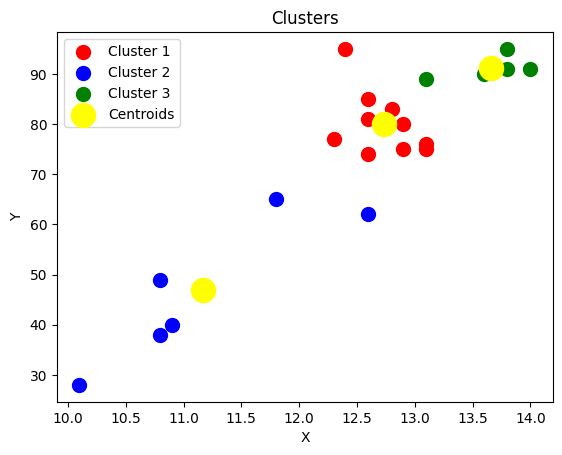

In [43]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [44]:
score = silhouette_score(X, kmeans.labels_)
score

0.3554745706810773

La eficiencia del modelo arroja 35.54% de efectividad

#Conclusion
La clasificacion final de las universidades es algo homogeneo usando el SAT y